<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Review CLT, Confidence Intervals, and Hypothesis Testing

_Authors: Matt Brems (DC)_

---

### Read in the housing data (code provided).

You can find the original data [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data).

In [7]:
import urllib

names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

import pandas as pd
data = pd.read_csv("../datasets/housing.data", header=None, names=names, delim_whitespace=True)

NOX = data['NOX'].values
AGE = data['AGE'].values

### 1. Find the mean, standard deviation, and the standard error of the mean for variable `AGE`

In [8]:
import numpy as np

In [9]:
print "The mean is " + str(np.mean(data['AGE'])) + "."
print "The standard deviation is " + str(np.std(data['AGE'])) + "."
print "The standard error of the mean is " + str(np.std(data['AGE'],ddof = 1)/(len(data['AGE']))**0.5) + "."

The mean is 68.5749011858.
The standard deviation is 28.1210325702.
The standard error of the mean is 1.25136952526.


### 2. Generate a 90%, 95%, and 99% confidence interval for `AGE`

You can use the `scipy.stats.t.interval` function to calculate confidence interval range.

```python
# Endpoints of the range that contains alpha percent of the distribution
stats.t.interval(alpha, df, loc=0, scale=1)	
```

Arguments:
- `df` = the degrees of freedom, will be the length of the vector -1.
- `loc` = the mean of the t-distribution (your point estimate - mean of the variable)
- `scale` = the standard deviation of the t-distribution (the standard error of your sample mean)

**Interpret the results from all three confidence intervals.**

In [10]:
from scipy.stats import t

In [11]:
t_interval_90 = t.interval(0.9,
                           len(AGE)-1,
                           loc=np.mean(AGE),
                           scale=np.std(AGE, ddof = 1)/(len(AGE))**0.5)

print "We are 90% confident that the true mean value for 'AGE' is between " + str(t_interval_90[0]) + " and " + str(t_interval_90[1]) + " years of age."

t_interval_95 = t.interval(0.95,
                           len(AGE)-1,
                           loc=np.mean(AGE),
                           scale=np.std(AGE, ddof = 1)/(len(AGE))**0.5)

print "We are 95% confident that the true mean value for 'AGE' is between " + str(t_interval_95[0]) + " and " + str(t_interval_95[1]) + " years of age."

t_interval_99 = t.interval(0.99,
                           len(AGE)-1,
                           loc=np.mean(AGE),
                           scale=np.std(AGE, ddof = 1)/(len(AGE))**0.5)

print "We are 99% confident that the true mean value for 'AGE' is between " + str(t_interval_99[0]) + " and " + str(t_interval_99[1]) + " years of age."

We are 90% confident that the true mean value for 'AGE' is between 66.512798667 and 70.6370037045 years of age.
We are 95% confident that the true mean value for 'AGE' is between 66.1163697185 and 71.033432653 years of age.
We are 99% confident that the true mean value for 'AGE' is between 65.3393604183 and 71.8104419532 years of age.


Recall that a 99% t confidence interval will be of the form

$$\bar{x}-t \frac{s}{\sqrt{n}} \ , \ \bar{x}+t \frac{s}{\sqrt{n}}$$

where `t` is the critical t-value with 506 degrees of freedom and for 99% confidence.

In [11]:
critical_t = t.ppf(0.995,506) # This pulls the critical value for 99.5%, which is appropriate.
print critical_t

2.58558040064


### 3. Did you rely on the Central Limit Theorem in question 2? Why or why not? Explain.


**A.** _Yes. We don't know whether or not 'AGE' is Normally distributed (and by the plot below, it clearly is not), but since the size of our sample n is larger than 30, we know that the behavior of X-bar will be Normal enough for us to use our t-distribution to generate our confidence intervals._

(array([  14.,   31.,   29.,   42.,   32.,   38.,   39.,   42.,   71.,  168.]),
 array([   2.9 ,   12.61,   22.32,   32.03,   41.74,   51.45,   61.16,
          70.87,   80.58,   90.29,  100.  ]),
 <a list of 10 Patch objects>)

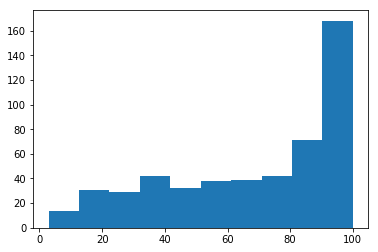

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(AGE)

### 4. For variable `NOX`, generate a 95% confidence interval and interpret it.

In [13]:
t_interval_95 = t.interval(0.95,
                           len(NOX)-1,
                           loc=np.mean(NOX),
                           scale=np.std(NOX, ddof = 1)/(len(NOX))**0.5)

print "We are 95% confident that the true mean value for 'NOX' is between " + str(t_interval_95[0]) + " and " + str(t_interval_95[1]) + "."

We are 95% confident that the true mean value for 'NOX' is between 0.544574262292 and 0.564815856285.


### 5. For the variable `NOX`, test the hypothesis that the mean is equal to the median. 

You may use scipy functions to complete this, but complete all steps listed below.

1. Define hypothesis
2. Set alpha (Let alpha = 0.05)
3. Calculate point estimate
4. Calculate test statistic
5. Find the p-value
6. Interpret results

In [14]:
## Step 1: Define hypotheses.
### H_0: mu_NOX = M_NOX
### H_A: mu_NOX != M_NOX

## Step 2: alpha = 0.05.
alpha = 0.05

## Step 3: Calculate point estimate.
sample_mean = np.mean(NOX)

## Step 4: Calculate test statistic.
t_statistic = (sample_mean - np.median(NOX))/(np.std(NOX, ddof=1)/len(NOX)**0.5)

## Step 5: Find p-value.
## t.sf is survival function, which is 1-cdf at a given value 
## (proportion of values at least as extreme as...)
p_value = t.sf(np.abs(t_statistic), len(NOX)) * 2 


## Because our alternative hypothesis is != (rather than greater than or less than),
## we multiply our p-value by 2. (This is called a two-sided test.)
print "Our sample median is" + str(np.median(NOX))
print "Our sample mean is " + str(sample_mean)
print "Our t-statistic is " + str(t_statistic)
print "Our p-value is " + str(p_value)

if p_value < alpha:
    print "We reject our null hypothesis and conclude that the true mean NOX value is different from the median NOX value."
elif p_value > alpha:
    print "We fail to reject our null hypothesis and cannot conclude that the true mean NOX value is different from the median ."
else:
    print "Our test is inconclusive."

Our sample median is0.538
Our sample mean is 0.554695059289
Our t-statistic is 3.24088371678
Our p-value is 0.00127005273618
We reject our null hypothesis and conclude that the true mean NOX value is different from the median NOX value.


### 6. What do you notice about the results from Exercise 4 and Exercise 5? 

**If you were going to generalize this to the relationship between hypothesis tests and confidence intervals, what might you say? Be specific.**

**A.** _When we calculated the median, it was 0.538. The 95% confidence interval for our mean contained 0.545 through 0.565. Since the median was outside our 95% confidence interval, this suggests that the true mean would not be equal to our median._

_We then conducted the hypothesis test and found that, at the alpha = 0.05 significance level, we rejected the hypothesis that the mean and median were equal._

_The results of our hypothesis test and confidence interval are in agreement here. Because our significance level (for HT) is alpha, as long as our confidence level (for CI) is 1 - alpha, the results should be in agreement.  
That is, if the value of interest does not lie in our 1 - alpha CI, then testing the hypothesis that the parameter equals the value of interest should be rejected at the alpha significance level. Similarly, if the value of interest *does* lie in our 1 - alpha CI, then testing the hypothesis that the parameter equals the value of interest should *not* be rejected at the alpha significance level._

### 7. For the variable `NOX`, test the hypothesis that the mean is greater than or equal to the median. 

You may use scipy functions to complete this, but complete all steps listed below.

1. Define hypothesis
2. Set alpha (Let alpha = 0.05)
3. Calculate point estimate
4. Calculate test statistic
5. Find the p-value
6. Interpret results

In [15]:
## Step 1: Define hypotheses.
### H_0: mu_NOX >= M_NOX
### H_A: mu_NOX < M_NOX

## Step 2: alpha = 0.05.
alpha = 0.05

## Step 3: Calculate point estimate.
sample_mean = np.mean(NOX)
sample_median = np.median(NOX)

## Step 4: Calculate test statistic.
t_statistic = (sample_mean - sample_median)/(np.std(NOX, ddof=1)/len(NOX)**0.5)

## Step 5: Find p-value.
p_value = t.sf(np.abs(t_statistic), len(NOX))
## Because our alternative hypothesis is < (rather than equal to),
## we DO NOT multiply our p-value by 2. (This is called a one-sided test.)

print "Our sample mean is " + str(sample_mean)
print "Our sample median is " + str(sample_median)
print "Our t-statistic is " + str(t_statistic)
print "Our p-value is " + str(p_value)

if p_value < alpha:
    print "We reject our null hypothesis and conclude that the true mean NOX value is greater than the median NOX value."
elif p_value > alpha:
    print "We fail to reject our null hypothesis and cannot conclude that the true mean NOX value is greater than the median ."
else:
    print "Our test is inconclusive."

Our sample mean is 0.554695059289
Our sample median is 0.538
Our t-statistic is 3.24088371678
Our p-value is 0.00063502636809
We reject our null hypothesis and conclude that the true mean NOX value is greater than the median NOX value.


### 8. Compare the p-values from Exercise 5 and Exercise 7. What do you notice?

**A.** _The p-value in Exercise 6 is exactly double the p-value in Exercise 8, by construction. This is because of the fact that our alternative hypotheses are different. In Exercise 6, we can reject the null hypothesis for very large values of mu or very small values of mu. Because this is a two-sided test, we double our p-value. In Exercise 8, we can reject the null hypothesis for very small values of mu *but* cannot reject the null hypothesis for very large values of mu. Because we can only reject on one side, we call this a one-sided test. Due to the fact that this is a one-sided test, we do not need to double our p-value._